In [2]:
from keras.layers import Input, Dense
from keras.models import Model
import pandas as pd
import numpy as np
from tqdm import tqdm
from sklearn import decomposition
import matplotlib.pyplot as plt
import datetime
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline

plt.style.use('seaborn')

Using TensorFlow backend.


In [3]:
metro = pd.read_csv("./data/Metro_time_series.csv")
metro.columns

Index(['Date', 'RegionName', 'AgeOfInventory', 'DaysOnZillow_AllHomes',
       'InventorySeasonallyAdjusted_AllHomes', 'InventoryRaw_AllHomes',
       'InventorySeasonallyAdjusted_BottomTier',
       'InventorySeasonallyAdjusted_MiddleTier',
       'InventorySeasonallyAdjusted_TopTier',
       'MedianListingPricePerSqft_1Bedroom',
       'MedianListingPricePerSqft_2Bedroom',
       'MedianListingPricePerSqft_3Bedroom',
       'MedianListingPricePerSqft_4Bedroom',
       'MedianListingPricePerSqft_5BedroomOrMore',
       'MedianListingPricePerSqft_AllHomes',
       'MedianListingPricePerSqft_CondoCoop',
       'MedianListingPricePerSqft_DuplexTriplex',
       'MedianListingPricePerSqft_SingleFamilyResidence',
       'MedianListingPrice_1Bedroom', 'MedianListingPrice_2Bedroom',
       'MedianListingPrice_3Bedroom', 'MedianListingPrice_4Bedroom',
       'MedianListingPrice_5BedroomOrMore', 'MedianListingPrice_AllHomes',
       'MedianListingPrice_CondoCoop', 'MedianListingPrice_DuplexTrip

In [13]:
# Filter data
prefilter_shape = metro.shape[0]
cols = ['Date', 'RegionName', 'ZHVI_AllHomes']
city_filter1 = metro.filter(cols)
for i in tqdm(cols):
    city_filter1 = city_filter1[city_filter1[str(i)].isnull() == False]
cityList = city_filter1.filter(['Date', 'RegionName'])
# city_filter1 = city_filter1.drop(['Date', 'RegionName'], axis='columns')

postfilter_shape = city_filter1.shape[0]

print(city_filter1.head())
print(cityList.head())
print(city_filter1.shape)
# print(city_filter1.sort_values('Date', ascending=True).head())
print("Filtered", (prefilter_shape - postfilter_shape), "values")

100%|██████████| 3/3 [00:00<00:00, 72.41it/s]

         Date RegionName  ZHVI_AllHomes
1  1996-04-30      10220        28600.0
2  1996-04-30      10300        78500.0
3  1996-04-30      10420        95700.0
4  1996-04-30      10500        67600.0
5  1996-04-30      10540       102900.0
         Date RegionName
1  1996-04-30      10220
2  1996-04-30      10300
3  1996-04-30      10420
4  1996-04-30      10500
5  1996-04-30      10540
(174379, 3)
Filtered 36803 values


In [6]:
# PCA analysis
pca = decomposition.PCA(n_components=1)
pca.fit(city_filter1)
city_PCA = pca.transform(city_filter1)
city_PCA = pd.DataFrame(data=city_PCA, columns=['1'])
city_PCA = city_PCA.join(pd.DataFrame(data=cityList.to_numpy(), columns=['Date', 'RegionName']))
city_PCA

,1,Date,RegionName
0,-107166.118627,1996-04-30,10220
1,-57266.118627,1996-04-30,10300
2,-40066.118627,1996-04-30,10420
3,-68166.118627,1996-04-30,10500
4,-32866.118627,1996-04-30,10540
...,...,...,...
174374,136833.881373,2017-12-31,49700
174375,1733.881373,2017-12-31,49740
174376,-21666.118627,2017-12-31,49780
174377,-40866.118627,2017-12-31,49820


In [8]:
cities = np.unique(city_PCA['RegionName'])

In [67]:
# Filter for a region
data_31080 = city_PCA[city_PCA['RegionName'] == '31080']
data_31080.shape

(47, 3)

Index(['Date', 'RegionName', 'ZHVI_AllHomes'], dtype='object')


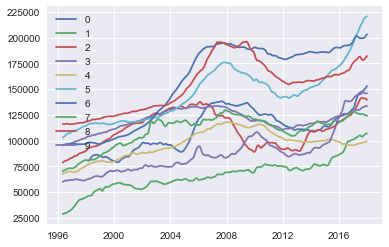

In [14]:
# Graph data
print(city_filter1.columns)
fig, ax = plt.subplots()
for i in range(10):
    dt = city_filter1[city_filter1['RegionName'] == str(cities[i])]
    ax.plot(pd.to_datetime(dt['Date']).dt.date, dt['ZHVI_AllHomes'], label=str(i))
ax.legend()

plt.show()

(261, 95)


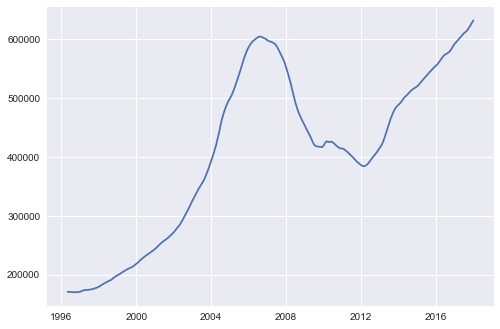

In [91]:
# Plot other features just to check
city_filter2 = metro[metro['RegionName'] == '31080']
print(city_filter2.shape)
plt.plot(pd.to_datetime(city_filter2['Date']).dt.date, city_filter2['ZHVI_AllHomes'])
plt.show()